In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [169]:
df_bike=pd.read_csv('Bike-Sharing-Dataset.csv')  
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [170]:
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [171]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [172]:
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [173]:
category_bike = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_bike = ['temp', 'atemp', 'hum', 'windspeed']

features_bike= category_bike + number_bike

In [174]:
df_bike[number_bike].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


In [175]:
df_bike[category_bike].astype('category').describe()

,season,holiday,mnth,hr,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,7,2,4
top,3,0,7,17,6,1,1
freq,4496,16879,1488,730,2512,11865,11413


In [176]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

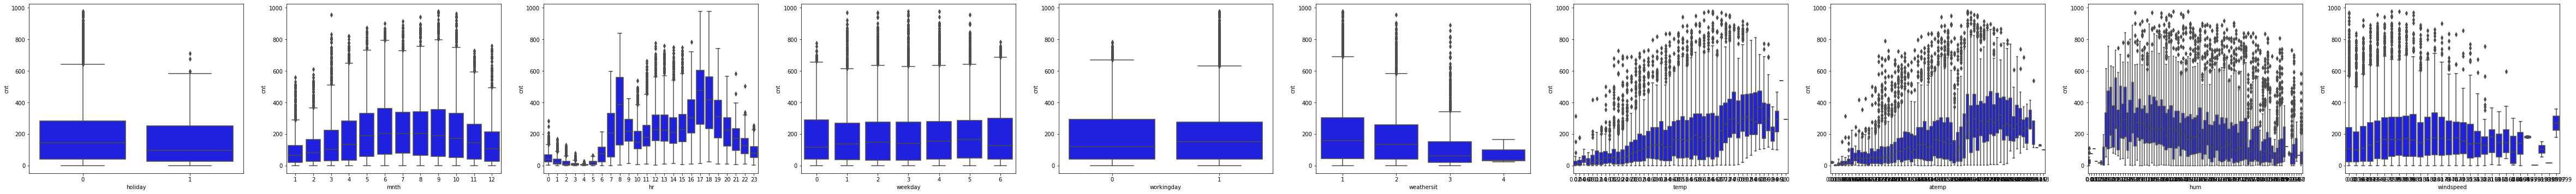

In [177]:
col_list=df_bike[features_bike].columns.values
plt.figure(figsize=(100,95))                          #Box plot to find out outliers
for i in range(1, len(col_list)):
    plt.subplot(14,12,i+1)
    sns.boxplot(data=df_bike,y="cnt",x=df_bike[col_list[i]],color='blue',orient='v')

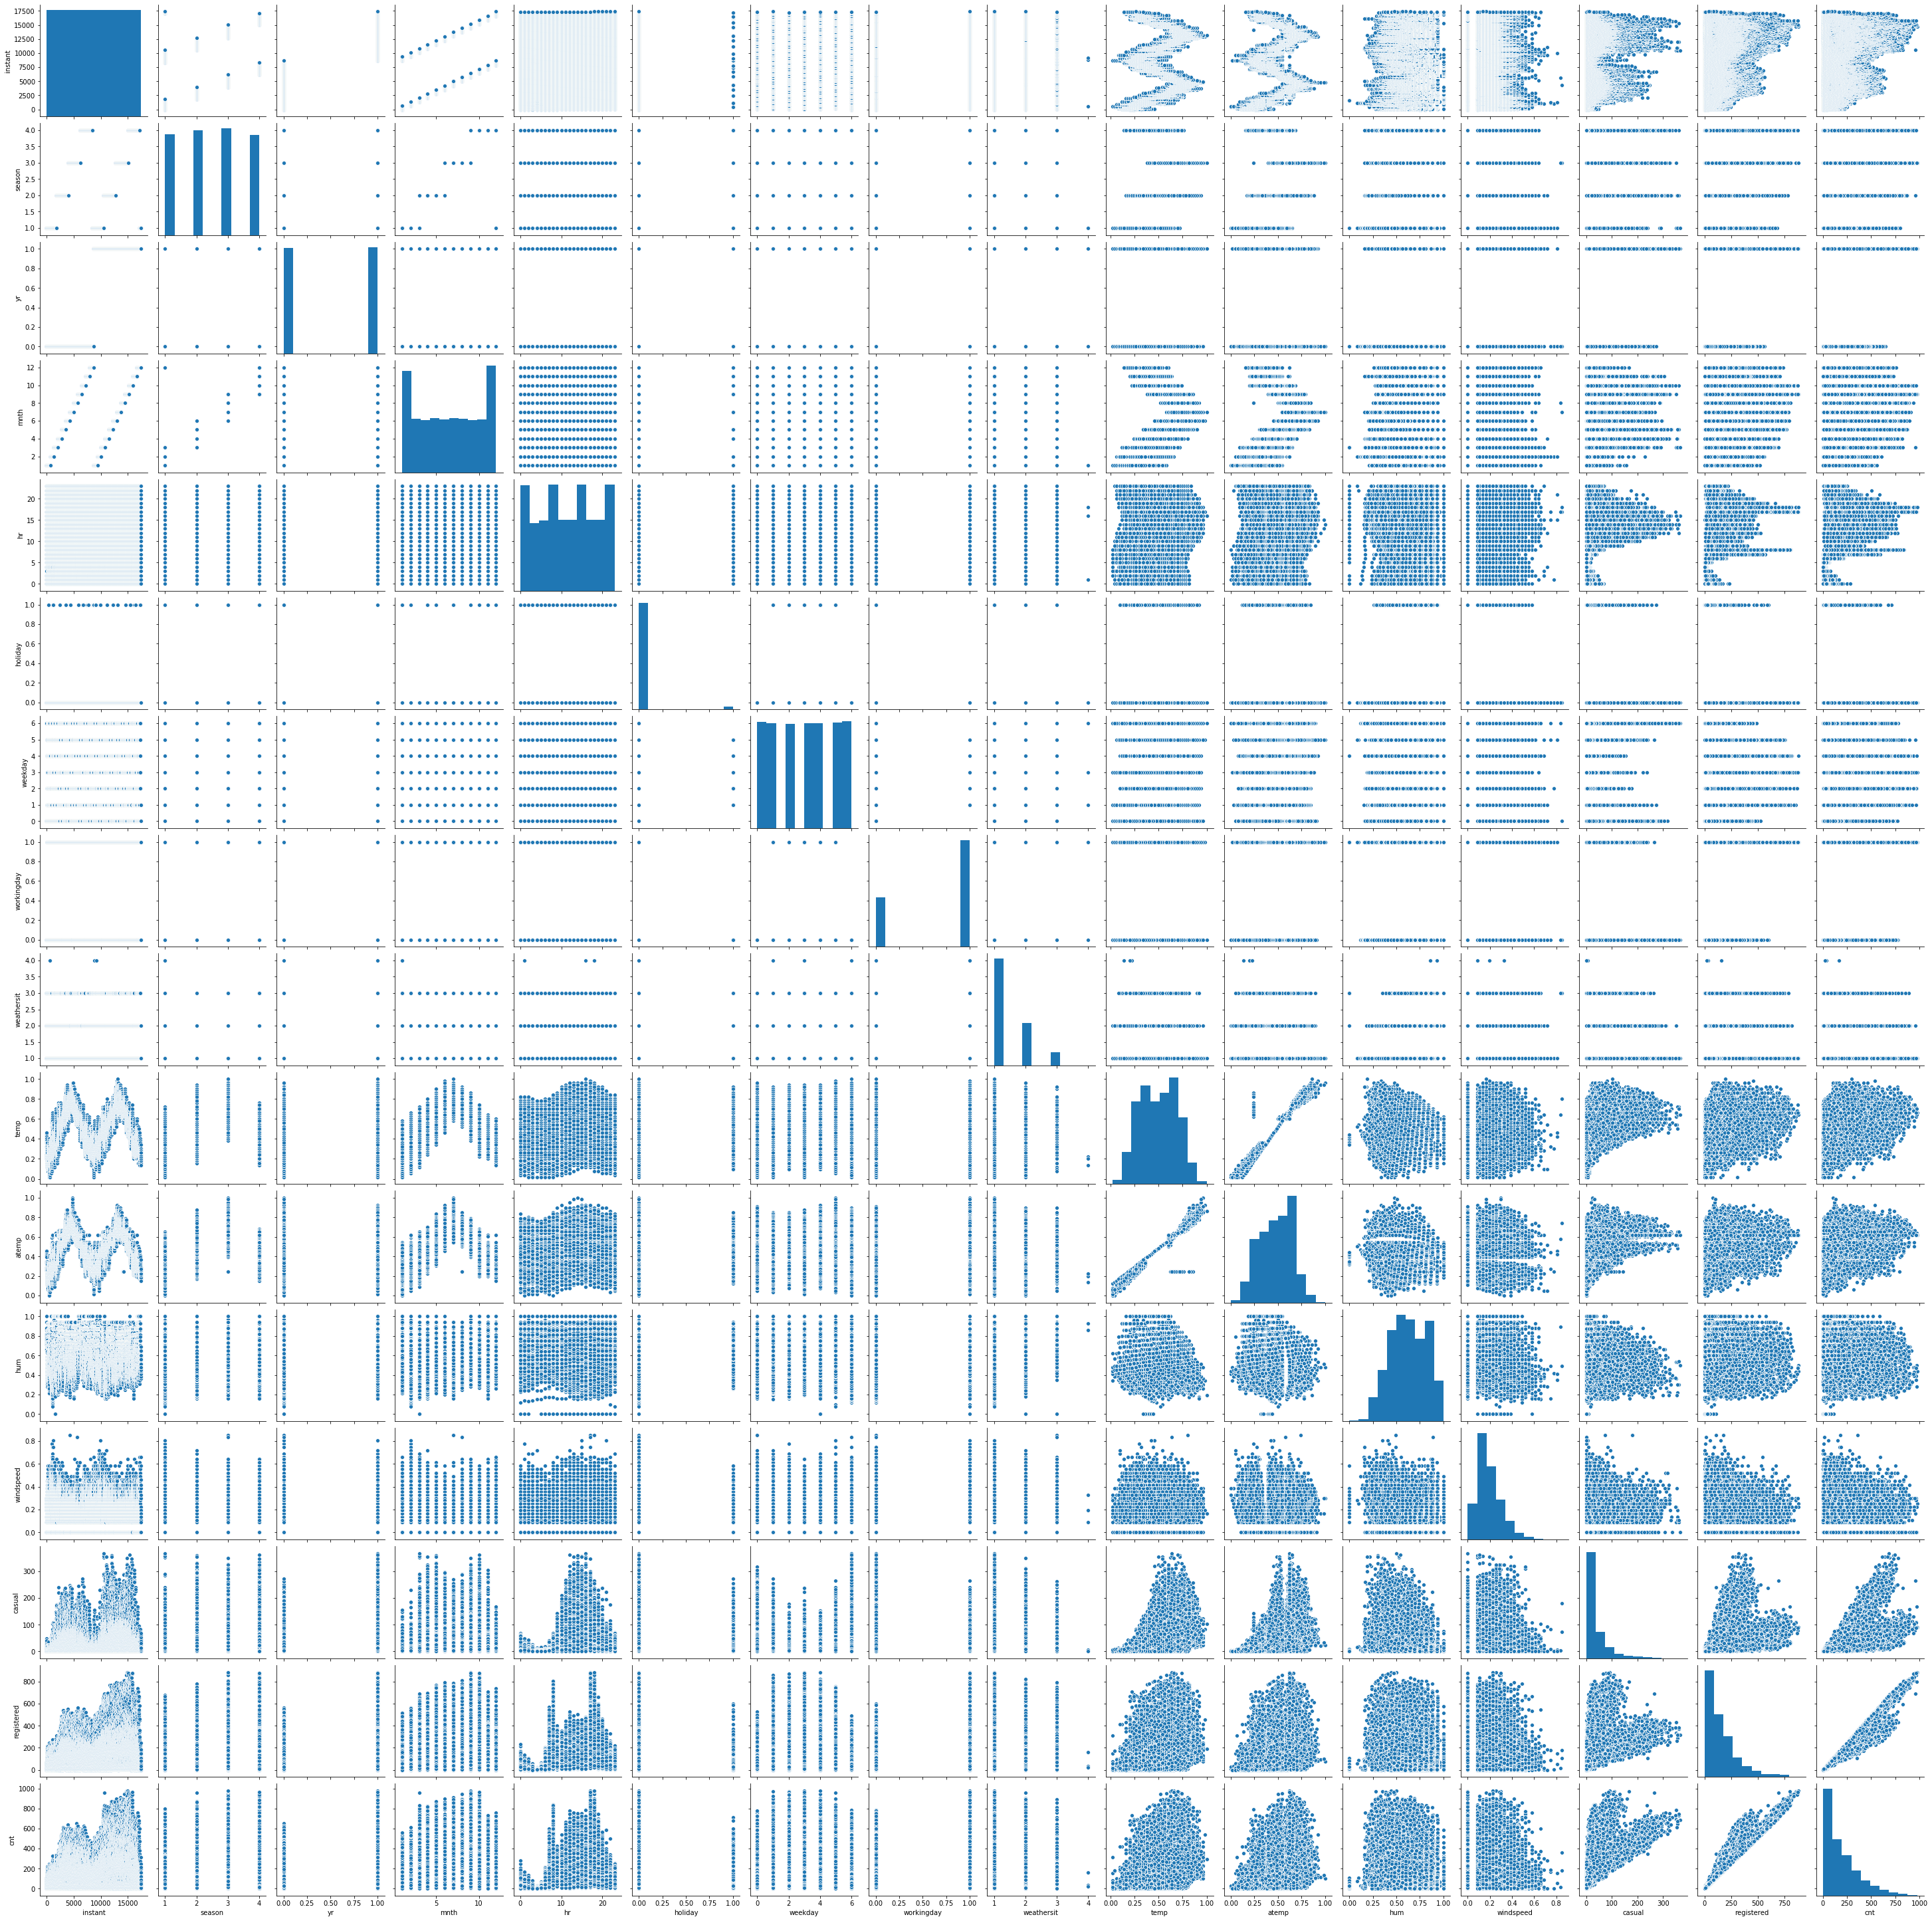

In [178]:
sns.pairplot(df_bike)

In [179]:
z_score=abs(zscore(df_bike[features_bike]))
print(df_bike[features_bike].shape)
df_bike_final=df_bike[features_bike].loc[(z_score<3).all(axis=1)]                  
print(df_bike_final.shape)
#to quantify the outliers

(17379, 11)
(16749, 11)


In [180]:
df_bike=df_bike[(z_score<3).all(axis=1)]
#to remove the outliers

In [181]:
df_bike[features_bike].shape

(16749, 11)

In [182]:
df_bike_cor=df_bike.corr()                          #To check the correlation
df_bike_cor

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.406139,0.867262,0.486486,-0.003650,NaN,0.004800,0.001665,-0.003290,0.137920,0.138786,-0.000789,-0.069671,0.159092,0.283521,0.279947
season,0.406139,1.000000,-0.010643,0.837209,-0.004196,NaN,-0.009896,0.011577,-0.007357,0.308185,0.314701,0.139534,-0.133293,0.114692,0.170770,0.173697
yr,0.867262,-0.010643,1.000000,-0.011023,-0.003718,NaN,0.001429,0.000268,-0.011088,0.042824,0.040922,-0.090118,-0.010128,0.145309,0.253853,0.251424
mnth,0.486486,0.837209,-0.011023,1.000000,-0.003799,NaN,0.007282,0.002405,0.012889,0.201877,0.207586,0.156018,-0.123585,0.064983,0.124351,0.121492
hr,-0.003650,-0.004196,-0.003718,-0.003799,1.000000,NaN,-0.003907,0.001667,-0.026633,0.138434,0.134604,-0.280751,0.134544,0.304211,0.376128,0.396467
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.004800,-0.009896,0.001429,0.007282,-0.003907,NaN,1.000000,0.012384,0.006402,-0.000521,-0.008817,-0.032532,0.009726,0.041192,0.019844,0.027686
workingday,0.001665,0.011577,0.000268,0.002405,0.001667,NaN,0.012384,1.000000,0.040997,0.049946,0.047831,0.014705,-0.008167,-0.310414,0.127347,0.022928
weathersit,-0.003290,-0.007357,-0.011088,0.012889,-0.026633,NaN,0.006402,0.040997,1.000000,-0.102476,-0.105428,0.434956,0.017249,-0.153430,-0.121545,-0.142959
temp,0.137920,0.308185,0.042824,0.201877,0.138434,NaN,-0.000521,0.049946,-0.102476,1.000000,0.987512,-0.081429,-0.011297,0.451761,0.331092,0.398528


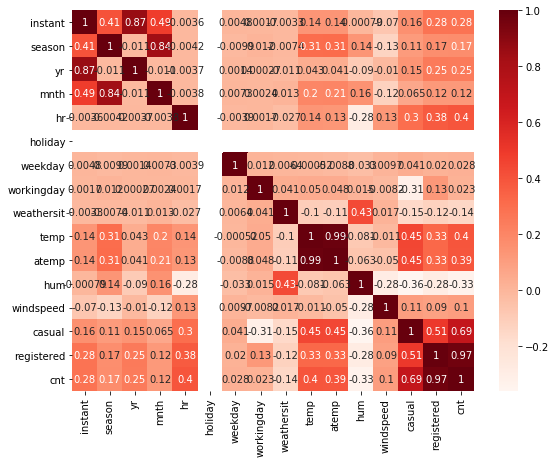

In [183]:
plt.figure(figsize=(9,7))
sns.heatmap(df_bike_cor,cmap='Reds',annot=True)

In [198]:
x = df_bike[features_bike]
y = df_bike['cnt']
#Spliting the data

In [199]:
x.shape

(16749, 11)

In [200]:
y.shape

(16749,)

In [201]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [202]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42  is:  0.3457765678297833
r2 score corresponding to random state:  43  is:  0.33605870743070365
r2 score corresponding to random state:  44  is:  0.34255273693080646
r2 score corresponding to random state:  45  is:  0.3132048263349141
r2 score corresponding to random state:  46  is:  0.34961451997215043
r2 score corresponding to random state:  47  is:  0.34396552466507846
r2 score corresponding to random state:  48  is:  0.3327380813889711
r2 score corresponding to random state:  49  is:  0.355076482029843
r2 score corresponding to random state:  50  is:  0.33986575946316955
r2 score corresponding to random state:  51  is:  0.34121567479980075
r2 score corresponding to random state:  52  is:  0.331479184450826
r2 score corresponding to random state:  53  is:  0.3144202831357952
r2 score corresponding to random state:  54  is:  0.34450688855353573
r2 score corresponding to random state:  55  is:  0.3383128247044288
r2 score corresponding to ran

In [203]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.06545718546426416

In [204]:
#since maximum r2 score is coming around random state 93, we will use that to create our first model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [205]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.33986575946316955
RMSE is:  152.16773119561188


In [206]:
df_bike_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_bike_pred.to_csv("Project4_Prediction.csv")